<a href="https://colab.research.google.com/github/Manzzzi/FoodOrderApp/blob/main/Students_PerformancePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 '''
MANSI SAPTALE
C22020881949
3948

CASE STUDY
This data set consists of the marks secured by the students in various subjects.

Example Research Questions:
How effective is the test preparation course?
Which major factors contribute to test outcomes?
What would be the best way to improve student scores on each test?
What patterns and interactions in the data can you find? Let me know in the comments section below.

Scenario:
Dataset is suitable for this purpose. There are 8 columns that are gender,race/ethnicity,parentel level of education, lunch,test preparation course,math score, writing score, and reading score. I will try to predict math score of studends through their categorical features which are gender,race/ethnicity,parentel level of education, lunch,and test preparation course. 
Data Features
gender: Male and female.
race/ethnicity: This feature has 5 different types. Group A,B,C,D and E.
parentel level of education: This is the educational level of the parents of children. There are six levels which are some high school,high school, some college, master's degree,bachelor's degree,associate's degree
test preparation course: This column gives a knowledge about If a studend has completed a course or not.
lunch: Students' lunch type is examined on this column.
Scores: There are three lesson scores which are math, writing and reading.

'''
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from statistics import stdev
from fractions import Fraction as fr

df = pd.DataFrame(data = pd.read_csv('/content/exams.csv'))
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [ ]:
from plotly.subplots import make_subplots
fig=make_subplots(rows=1,cols=2,subplot_titles=('<i>parental level of education', '<i>test preparation course'))

fig.add_trace(go.Histogram(x=df['parental level of education'],name='parental level of education'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['test preparation course'],name='test preparation course'),row=1,col=2)


fig.update_layout(height=600, width=1000, title_text='<b>Feature Distribution', font_size=20)
 
  
   fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New')

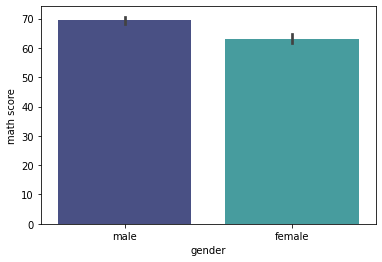

In [ ]:
sns.barplot(x="gender", y="math score",data=df,palette="mako");   
#here math score is anlyized of gender and performance is analyzed of every student.

In [ ]:
c=df.groupby(['parental level of education']).mean()
c
#here mean of parental level of eduaction such as bacheleors,masters degree is been checked hoow it has affected in performance of students.

,math score,reading score,writing score
parental level of education,,,
associate's degree,69.536946,70.985222,70.113300
bachelor's degree,71.491071,74.008929,74.410714
high school,65.207921,67.400990,64.846535
master's degree,71.585714,75.428571,75.885714
some college,65.297297,68.045045,66.734234
some high school,60.701571,64.408377,62.539267


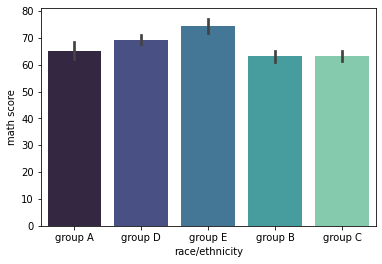

In [ ]:
sns.barplot(x="race/ethnicity", y="math score",data=df,palette="mako");

#here math score is anlyized of groups and performance is analyzed of every student.

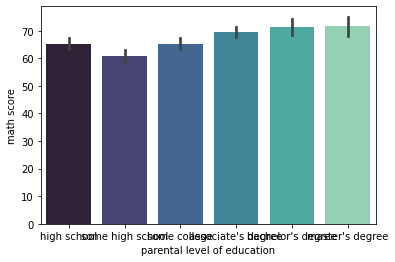

In [ ]:
sns.barplot(x="parental level of education", y="math score",data=df,palette="mako");

#here math score is anlyized of parental level of education and performance is analyzed of every student.

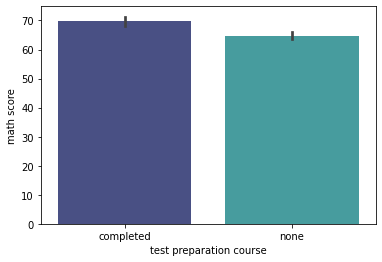

In [ ]:
sns.barplot(x="test preparation course", y="math score",data=df,palette="mako"); 

#here math score is anlyized with preparation of students and performance is analyzed of every student.

In [ ]:
#Univariate analysis explores each variable in a data set, separately each data feature like gender,race,parental ethnicity,lunch,preparation
def univariant_analysis(df, features):
    rows = 2
    cols = 3
    fig = make_subplots(rows=2, cols=3, specs=[[{"type": "Pie"}, {"type": "Pie"}, {"type": "Pie"}], [{"type": "Pie"}, {"type": "Pie"}, {"type": "Pie"}]])    
    counter = 0
    for i in range(rows):
        i+= 1
        for j in range(cols):
            j +=1
            if counter > 4:
                fig.show()
                
            else:
                vc = df[features[counter]].value_counts()
                fig.append_trace(go.Pie(labels=vc.index, values=vc.values, textinfo='label+percent', insidetextorientation='radial'), row=i, col=j)
                fig.update_layout(title='Univariante Analysis',title_x= 0.5, title_y=1, showlegend=False)
                counter +=1
    
    
features= ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
univariant_analysis(df, features)


In [ ]:
# build the fuction for Parent Level of eduction to compare to test scores
# This will allow us to see if there is any correlations between the categories
def chi_score_lunch(variable):
    var = df[variable]
    # we are crosstab as chi2 contigency reads in a congency type of table.
    parent_ed_score = pd.crosstab(index = df["lunch"], columns = var)
    # find the values and print them.
    chisquare = chi2_contingency(parent_ed_score)
    print(f"Lunch compared to {variable} gives the following results:")
    print("Chi Square Value is: ", chisquare[0].round(2))
    print("P Value is: ", chisquare[1].round(2))
    print("DF is: ", chisquare[2])
    print('\n')
    
for i in df.columns[range(5,8)]:
    chi_score_lunch(i)

Lunch compared to math score gives the following results:
Chi Square Value is:  190.56
P Value is:  0.0
DF is:  76


Lunch compared to reading score gives the following results:
Chi Square Value is:  132.52
P Value is:  0.0
DF is:  72


Lunch compared to writing score gives the following results:
Chi Square Value is:  178.57
P Value is:  0.0
DF is:  75




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

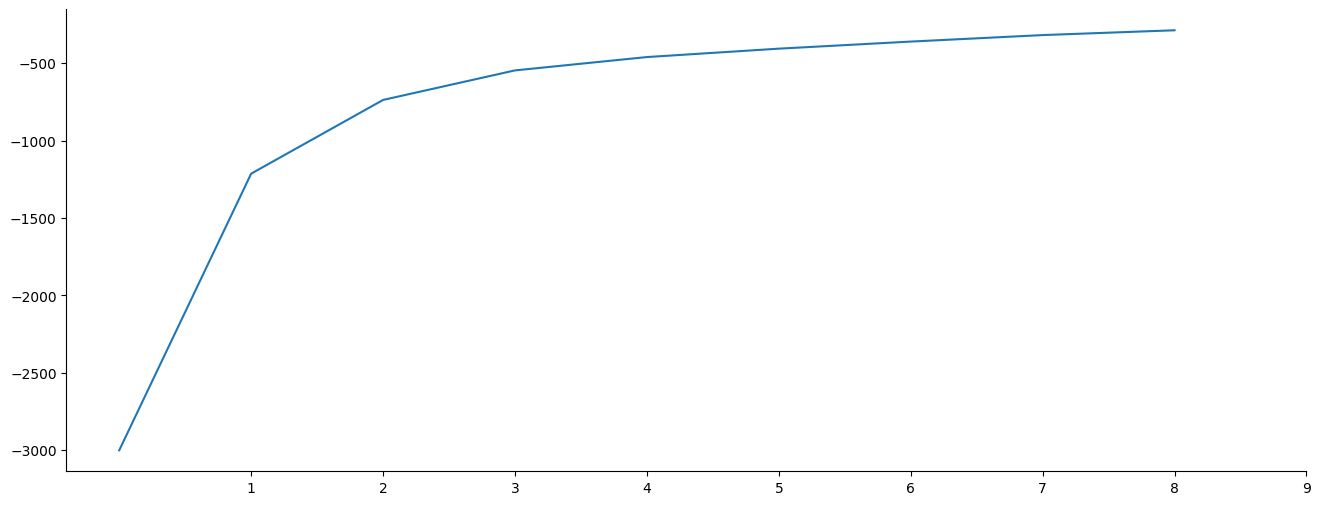

In [ ]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# process dataset 
features = ['math score', 'reading score','writing score']
df_kmeans = df.copy()
data = df_kmeans[features].copy()
data = data.values
# scale data
scaler = StandardScaler()
data = scaler.fit_transform(data)
# run KMeans
kmeans = KMeans(n_clusters=2)
n_cluster = range(1,10)

kmeans =[KMeans(n_clusters =i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

#create graph
f =plt.figure(1, figsize =(16,6))
plt.plot(scores)
_= plt.xticks(n_cluster)


sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()



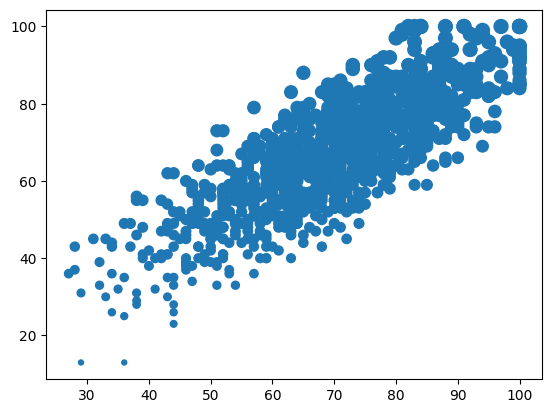

In [ ]:
plt.scatter(df['reading score'],df['math score'], df['math score'])

In [ ]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted=km.fit_predict(df[['math score','reading score']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 0, 2,
       1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1,
       1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2,
       0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1,
       1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1,
       0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 0,
       0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2,

In [ ]:
df['cluster']=y_predicted
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluter,cluster
0,male,group A,high school,standard,completed,67,67,63,1,1
1,female,group D,some high school,free/reduced,none,40,59,55,2,2
2,male,group E,some college,free/reduced,none,59,60,50,1,1
3,male,group B,high school,standard,none,77,78,68,0,0
4,male,group E,associate's degree,standard,completed,78,73,68,0,0


In [ ]:
km.cluster_centers_

array([[82.37134503, 83.92397661],
       [63.73660714, 67.015625  ],
       [46.05238095, 48.93809524]])

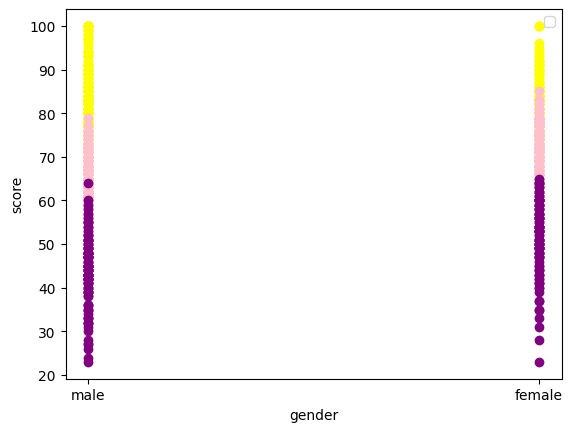

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.gender,df1['math score'],color='yellow')
plt.scatter(df2.gender,df2['reading score'],color='pink')
plt.scatter(df3.gender,df3['writing score'],color='purple')

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers[:,1],color='red',marker='*',label='centroid')

plt.xlabel('gender')
plt.ylabel('score')
plt.legend()

In [ ]:
#determing number of clusters in dataset i.e elbow method
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd 
import seaborn as sns

df = pd.read_csv('/content/exams.csv')

X=df.iloc[:,[3,4]].values

X

array([['standard', 'completed'],
       ['free/reduced', 'none'],
       ['free/reduced', 'none'],
       ...,
       ['free/reduced', 'none'],
       ['standard', 'none'],
       ['standard', 'completed']], dtype=object)

        math score  reading score  writing score
gender                                          
female   63.196687      71.888199      71.708075
male     69.384913      66.305609      64.029014


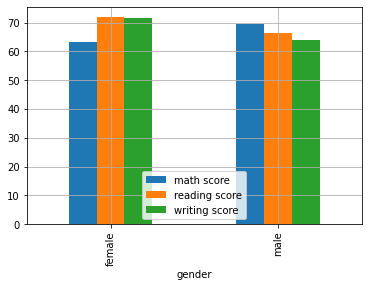

In [ ]:
df4=df.groupby('gender')[['math score','reading score','writing score']].mean()
print(df4)
df4.plot(kind='bar',grid=True)
#here mean of scores is been calculated and shows how dataset is affected and been checked hoow it has affected in performance of students.

        math score  reading score  writing score
gender                                          
female        63.0           72.0           72.0
male          70.0           67.0           64.0


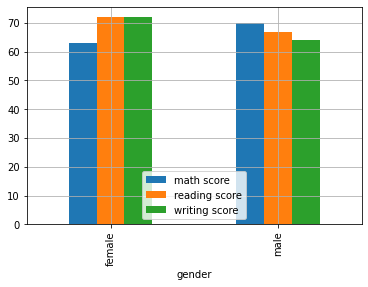

In [ ]:
df4=df.groupby('gender')[['math score','reading score','writing score']].median()
print(df4)
df4.plot(kind='bar',grid=True)
#here median removes mid values of scores and been checked hoow it has affected in performance of students.

In [ ]:
df4.mode()            #mode of math scores

,math score,reading score,writing score
0,63.196687,66.305609,64.029014
1,69.384913,71.888199,71.708075


In [ ]:
df4.std()             #standard devaiation of scores

math score       4.375736
reading score    3.947487
writing score    5.429916
dtype: float64

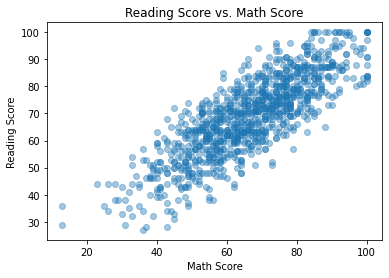

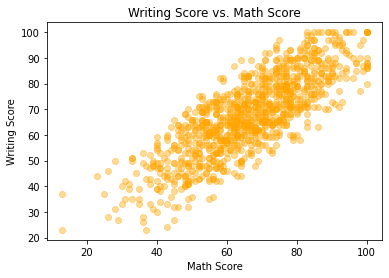

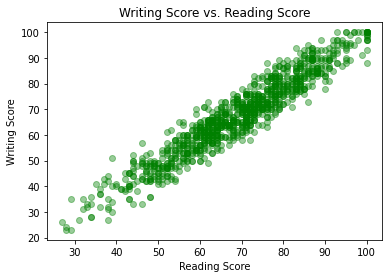

In [ ]:
#linear regression
data=pd.read_csv('/exams.csv')
data.head()
math=np.array(data['math score']).reshape(-1,1)
reading=np.array(data['reading score']).reshape(-1,1)
writing=np.array(data['writing score']).reshape(-1,1)

plt.scatter(data['math score'],data['reading score'],alpha=0.4)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Reading Score vs. Math Score')
plt.show()

plt.scatter(data['math score'],data['writing score'],alpha=0.4,color='orange')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Writing Score vs. Math Score')
plt.show()

plt.scatter(data['reading score'],data['writing score'],alpha=0.4,color='green')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Writing Score vs. Reading Score')
plt.show()


In [ ]:
from scipy.stats import f_oneway
gender = [168.8,168.8,171.2,176.6,176.6]
race = [64.1,64.1,65.5,66.2,66.4]
lunch= [13495,16500,16500,13950,17450]
# Conduct the one-way ANOVA
f_oneway(gender,race,lunch)

F_onewayResult(statistic=392.04144576903457, pvalue=1.17310728615647e-11)

In [ ]:
#ttest
import numpy as np
import pandas as pd
from scipy import stats
df=pd.read_csv('/exams.csv')
df.head()
a = pd.get_dummies(df['gender'], drop_first=True).astype(float)
b = pd.get_dummies(df['lunch'],drop_first=True).astype(float)
print(a.info())
print(b.info())
t2=stats.ttest_ind(a,b)
t2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   male    1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   standard  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB
None


Ttest_indResult(statistic=array([-6.18068065]), pvalue=array([7.71556433e-10]))

In [ ]:
import scipy.stats as stats                 #corelation

corr, _ = stats.pearsonr (gender, lunch)
corr

0.148277819064232

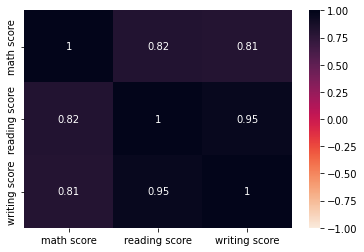

In [ ]:
import seaborn as sns                       #corelation matrix
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()